In [1]:
# Don't forget to execute this cell
import bionetgen as pybng
import matplotlib.pyplot as plt

# PyBioNetGen - a simple library for BioNetGen models

*PyBioNetGen* (PyBNG) is designed to be simple library to read and manipulate BNGL models that also serves as a convenient way to install bionetgen and quickly run models either from the command line or via python scripting. This library will also be the main platform for future development, we are working on improved model parsing and efficient simulators. 

This notebook is designed to showcase the features of the library side of PyBNG and simple things you can do directly from a python environment. See [here](https://pybionetgen.readthedocs.io/) for PyBNG documentation. 

## Running models 

PyBNG comes with a simple `run` command that simply executes the model you give it. 

In [2]:
# this command runs the model in a temporary folder which is removed after execution is done
results = pybng.run("SIR.bngl")

BioNetGen version 2.6.0
Reading from file /home/boltzmann/Workshop_2021/bionetgen/pybionetgen/SIR.bngl (level 0)
Read 5 parameters.
Read 3 species.
Read 3 observable(s).
Read 2 reaction rule(s).
ACTION: generate_network( SIR )
Iteration   0:     3 species      0 rxns  0.00e+00 CPU s
Iteration   1:     3 species      2 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Total   :     2 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Wrote network in net format to ./SIR.net.
CPU TIME: generate_network 0.02 s.
ACTION: simulate( method=>"cvode" )
Network simulation using cvode
Wrote network in net format to ./SIR.net.
Running run_network on DESKTOP-140OHL9
full command: /home/boltzmann/apps/anaconda3/lib/python3.7/site-packages/bionetgen/bng-linux/bin/run_network -o ./SIR -p cvode -a 1e-08 -r 1e-08 --cdat 1 --fdat 0 -g ./SIR.net ./SIR.net 0.15 200
[simulation PID is: 31616

In [3]:
# we'll come back to this folder, so let's keep the path
curr_dir = os.getcwd()
if not os.path.isdir("results"):
    os.mkdir("results")
# you can optionally give a folder name to run the model under, files won't be removed
result_obj = pybng.run("SIR.bngl", out=os.path.join("results", "SIR")) # in folder "my_output"

BioNetGen version 2.6.0
Reading from file /home/boltzmann/Workshop_2021/bionetgen/pybionetgen/SIR.bngl (level 0)
Read 5 parameters.
Read 3 species.
Read 3 observable(s).
Read 2 reaction rule(s).
ACTION: generate_network( SIR )
Iteration   0:     3 species      0 rxns  0.00e+00 CPU s
Iteration   1:     3 species      2 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Total   :     2 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Wrote network in net format to ./SIR.net.
CPU TIME: generate_network 0.00 s.
ACTION: simulate( method=>"cvode" )
Network simulation using cvode
Wrote network in net format to ./SIR.net.
Running run_network on DESKTOP-140OHL9
full command: /home/boltzmann/apps/anaconda3/lib/python3.7/site-packages/bionetgen/bng-linux/bin/run_network -o ./SIR -p cvode -a 1e-08 -r 1e-08 --cdat 1 --fdat 0 -g ./SIR.net ./SIR.net 0.15 200
[simulation PID is: 31619

In [4]:
# please note that running with an output folder will place you in the folder you selected
print(os.getcwd())

/home/boltzmann/Workshop_2021/bionetgen/pybionetgen/results/SIR


`run` command automatically reads all the output files and returns a results object. All output files are converted into `numpy record arrays`, see [here](https://numpy.org/doc/stable/reference/generated/numpy.recarray.html) for more information.

In [5]:
print(results) # this gives you a summary of what's stored in the object

gdats from 1 models: SIR
cdats from 1 models: SIR


In [6]:
results.gdats["SIR"][:10] # you can look at gdats file via the gdats attribute

rec.array([(0.  , 99.        , 1.        , 0.        ),
           (0.15, 98.87298897, 1.07566049, 0.05135054),
           (0.3 , 98.7365611 , 1.15685706, 0.10658185),
           (0.45, 98.59005797, 1.24396498, 0.16597704),
           (0.6 , 98.43278098, 1.33738054, 0.22983849),
           (0.75, 98.26399011, 1.4375212 , 0.2984887 ),
           (0.9 , 98.08290282, 1.54482586, 0.37227132),
           (1.05, 97.8886927 , 1.65975502, 0.45155228),
           (1.2 , 97.68048848, 1.78279067, 0.53672085),
           (1.35, 97.45737335, 1.91443598, 0.62819067)],
          dtype=[('time', '<f8'), ('S', '<f8'), ('I', '<f8'), ('R', '<f8')])

In [7]:
results[0][:10] # or by indexing which defaults to loaded gdat files

rec.array([(0.  , 99.        , 1.        , 0.        ),
           (0.15, 98.87298897, 1.07566049, 0.05135054),
           (0.3 , 98.7365611 , 1.15685706, 0.10658185),
           (0.45, 98.59005797, 1.24396498, 0.16597704),
           (0.6 , 98.43278098, 1.33738054, 0.22983849),
           (0.75, 98.26399011, 1.4375212 , 0.2984887 ),
           (0.9 , 98.08290282, 1.54482586, 0.37227132),
           (1.05, 97.8886927 , 1.65975502, 0.45155228),
           (1.2 , 97.68048848, 1.78279067, 0.53672085),
           (1.35, 97.45737335, 1.91443598, 0.62819067)],
          dtype=[('time', '<f8'), ('S', '<f8'), ('I', '<f8'), ('R', '<f8')])

In [8]:
results.cdats["SIR"][:10] # for other types of files you need to manually select them

rec.array([(0.  , 99.        , 1.        , 0.        ),
           (0.15, 98.87298897, 1.07566049, 0.05135054),
           (0.3 , 98.7365611 , 1.15685706, 0.10658185),
           (0.45, 98.59005797, 1.24396498, 0.16597704),
           (0.6 , 98.43278098, 1.33738054, 0.22983849),
           (0.75, 98.26399011, 1.4375212 , 0.2984887 ),
           (0.9 , 98.08290282, 1.54482586, 0.37227132),
           (1.05, 97.8886927 , 1.65975502, 0.45155228),
           (1.2 , 97.68048848, 1.78279067, 0.53672085),
           (1.35, 97.45737335, 1.91443598, 0.62819067)],
          dtype=[('time', '<f8'), ('S1', '<f8'), ('S2', '<f8'), ('S3', '<f8')])

You can index the record arrays with observable names. This allows for quick plotting of results or doing analysis on the time series generated by BNG. 

In [9]:
r = results[0] # let's get the gdat record array
print(r.dtype.names) # this will print the names of the observables you can select

('time', 'S', 'I', 'R')


Let's plot each time series that is loaded in. 

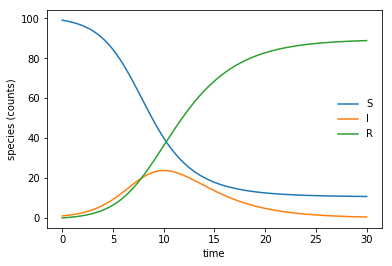

In [10]:
for name in r.dtype.names:
    if name != "time":
        plt.plot(r['time'], r[name], label=name)
plt.xlabel("time")
plt.ylabel("species (counts)")
_ = plt.legend(frameon=False)

PyBNG also comes with basic BNGL parsing capabilities. We are working on a much better parsing solution using C++ and that will become the default way to parse models in the future. This creates a simple model object that allows some basic programmatic manipulation of the model.

In [11]:
# since we moved directories, we don't have the BNGL in the folder we are in right now, we need to go back
os.chdir(curr_dir)
model = pybng.bngmodel("SIR.bngl")

This model object is written with BNGL in mind, so printing the model or individual blocks will give you the BNGL of that portion of the model.

In [12]:
print(model)

begin model

begin parameters
  N 100
  I0 1
  R0 2.5
  g 0.33
  b (g*R0)/N
  _InitialConc1 N-I0
end parameters

begin molecule types
  I()
  R()
  S()
end molecule types

begin species
  S() _InitialConc1
  I() I0
  R() 0
end species

begin observables
  Molecules S S()
  Molecules I I()
  Molecules R R()
end observables

begin reaction rules
  _R1: S() + I() -> I() + I() b
  _R2: I() -> R() g
end reaction rules

end model




In [13]:
print(model.parameters)


begin parameters
  N 100
  I0 1
  R0 2.5
  g 0.33
  b (g*R0)/N
  _InitialConc1 N-I0
end parameters



The model is also written with python in mind and the objects behave in a pythonic manner whenever possible. For more information, please check the model documentation [here](https://pybionetgen.readthedocs.io/en/latest/bngmodel.html)

In [14]:
for block in model:
    print(block.name)
    if block.name == "parameters":
        print(f"Looping over block: {block.name}")
        for param in block:
            print(f"parameter name: {param}, value: {model.parameters[param]}")
    elif block.name == "observables": 
        print(f"Looping over block: {block.name}")
        for obs in block:
            o = block[obs]
            print(f"observable name: {o.name}, patterns: {o.patterns}, type: {o.type}")

parameters
Looping over block: parameters
parameter name: N, value: N 100
parameter name: I0, value: I0 1
parameter name: R0, value: R0 2.5
parameter name: g, value: g 0.33
parameter name: b, value: b (g*R0)/N
parameter name: _InitialConc1, value: _InitialConc1 N-I0
molecule types
species
observables
Looping over block: observables
observable name: S, patterns: [S()], type: Molecules
observable name: I, patterns: [I()], type: Molecules
observable name: R, patterns: [R()], type: Molecules
reaction rules


Simple manipulations of the model object is possible, particularly static values (e.g. parameter values, compartment sizes, initial species counts). This allows for some very simple analyses that can be done using this API. Please note that this is a fairly inefficient implementation for complicated analyses since this process writes does a lot of file I/O. We will talk more about more efficient ways to implement analyses in the advanced topics lesson.

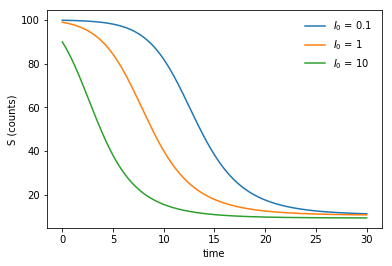

In [15]:
model.add_action("simulate", action_args=[("method","ode"),("t_end",30),("n_steps",300)])
for i in [0.1,1,10]:
    obs_key = "S"
    model.parameters.I0 = i
    # run can also take a model object as an argument
    # you can also suppress BNG output by using the keyword argument "suppress"
    result = pybng.run(model, suppress=True)
    plt.plot(result[0]['time'], result[0][obs_key], label="$I_{0}$ = "+f"{i}")
_ = plt.xlabel("time")
_ = plt.ylabel(f"{obs_key} (counts)")
_ = plt.legend(frameon=False)

PyBNG also allows for programmatically working with patterns. Let's load in another model that has structure and see how it works.

In [16]:
auto = pybng.bngmodel("auto.bngl")

In [17]:
print(auto.rules)


begin reaction rules
  R1: K1(Y~0) -> K1(Y~P) S
  R2: K1(Y~0) + K1(Y~P) -> K1(Y~P) + K1(Y~P) _rateLaw1
  R3: K1(Y~P) + P(b) <-> K1(Y~P!1).P(b!1) _rateLaw2,_rateLaw3
  R4: K1(Y~P!1).P(b!1) -> K1(Y~0) + P(b) _rateLaw4
end reaction rules



In [18]:
for rule in auto.rules:
    r = auto.rules[rule]
    print("####")
    print(f"Rule: {r}")
    reactants = r.reactants
    products = r.products
    print("  Reactants:")
    for reactant in reactants:
        print(f"    Reactant: {reactant}")
        for molecule in reactant:
            print(f"      Molecule: {molecule}, name: {molecule.name}")
            for component in molecule:
                print(f"        Component: {component}, name: {component.name}, state: {component.state}")
    print("  Products:")
    for product in products:
        print(f"    Product: {reactant}")
        for molecule in reactant:
            print(f"      Molecule: {molecule}, name: {molecule.name}")
            for component in molecule:
                print(f"        Component: {component}, name: {component.name}, state: {component.state}")
print("####")

####
Rule: R1: K1(Y~0) -> K1(Y~P) S
  Reactants:
    Reactant: K1(Y~0)
      Molecule: K1(Y~0), name: K1
        Component: Y~0, name: Y, state: 0
  Products:
    Product: K1(Y~0)
      Molecule: K1(Y~0), name: K1
        Component: Y~0, name: Y, state: 0
####
Rule: R2: K1(Y~0) + K1(Y~P) -> K1(Y~P) + K1(Y~P) _rateLaw1
  Reactants:
    Reactant: K1(Y~0)
      Molecule: K1(Y~0), name: K1
        Component: Y~0, name: Y, state: 0
    Reactant: K1(Y~P)
      Molecule: K1(Y~P), name: K1
        Component: Y~P, name: Y, state: P
  Products:
    Product: K1(Y~P)
      Molecule: K1(Y~P), name: K1
        Component: Y~P, name: Y, state: P
    Product: K1(Y~P)
      Molecule: K1(Y~P), name: K1
        Component: Y~P, name: Y, state: P
####
Rule: R3: K1(Y~P) + P(b) <-> K1(Y~P!1).P(b!1) _rateLaw2,_rateLaw3
  Reactants:
    Reactant: K1(Y~P)
      Molecule: K1(Y~P), name: K1
        Component: Y~P, name: Y, state: P
    Reactant: P(b)
      Molecule: P(b), name: P
        Component: b, name: b, sta